# Course Title: Data Analytics & Statistics in Python
## Metropolia University of Applied Sciences
## Week 6: Good & Bad Visualisation
### Date: 9.4.2025

<table "<table style="width: 100%;">
  <tr>
    <td style="text-align: left; vertical-align: middle;">
      <ul style="list-style: none; padding-left: 0;">
        <li><strong>Instructor</strong>: Hamed Ahmadinia, Ph.D</li>
        <li><strong>Email</strong>: hamed.ahmadinia@metropolia.fi
        <li><strong>Web</strong>: www.ahmadinia.fi</li>          </li>
      </ul>
    </td>
  </tr>
</table>

**© 2025 Hamed Ahmadinia – [CC BY-NC 4.0](https://creativecommons.org/licenses/by-nc/4.0/)**

# Good & Bad Visualisation
Data visualization is the graphical representation of information and data using visual elements like charts, graphs, and maps. It helps in understanding complex data clearly and quickly. Python offers various libraries for creating visualizations, including Matplotlib, Seaborn, Plotly, and Pandas.

In this notebook, we use real **90-day cryptocurrency time series data** for the top 5 cryptocurrencies from the Binance Public API to illustrate examples of good and bad visualizat.


In [310]:
# Import necessary libraries
import requests  # For making HTTP requests to APIs (e.g., fetching live crypto data)
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For basic plotting and data visualization
import seaborn as sns  # For advanced and aesthetically pleasing statistical plots
import time  # For managing delays, timestamps, or measuring execution time
import random  # For generating random numbers (useful for simulations or sampling)
import matplotlib.dates as mdates  # For formatting and handling dates in Matplotlib plots
import math  # For mathematical operations and functions (e.g., log, sqrt)
from mpl_toolkits.mplot3d import Axes3D  # For creating 3D plots using Matplotlib

# Data Loading


1. Fetches 24-hour ticker data for **all** trading pairs on Binance.
2. Filters to USDT pairs and picks the **top 5** by 24-hour quote volume.
3. For each of those 5 pairs, retrieves the **last 90 days of daily klines** (OHLCV).
4. Stores each symbol’s time series in a dictionary.

In [313]:
# 1) Get 24hr ticker data for all symbols
url_24hr = "https://api.binance.com/api/v3/ticker/24hr"
response_24hr = requests.get(url_24hr)
data_24hr = response_24hr.json()

df_24hr = pd.DataFrame(data_24hr)

# 2) Filter to USDT pairs only
df_usdt = df_24hr[df_24hr['symbol'].str.endswith('USDT')].copy()

# 3) Convert quoteVolume to numeric and sort descending
df_usdt['quoteVolume'] = pd.to_numeric(df_usdt['quoteVolume'], errors='coerce')
df_usdt = df_usdt.sort_values('quoteVolume', ascending=False)

# 4) Take top 5 by quote volume
top5_symbols = df_usdt['symbol'].head(5).tolist()
print("Top 5 symbols by USDT quote volume:", top5_symbols)

# 5) For each symbol, get daily klines for last 90 days
historical_data = {}

for symbol in top5_symbols:
    url_klines = "https://api.binance.com/api/v3/klines"
    params_klines = {
        "symbol": symbol,
        "interval": "1d",  # daily
        "limit": 90        # last 90 days
    }
    resp_klines = requests.get(url_klines, params=params_klines)
    data_klines = resp_klines.json()
    
    # Parse into a DataFrame
    df_klines = pd.DataFrame(data_klines, columns=[
        "open_time", "open", "high", "low", "close", "volume",
        "close_time", "quote_volume", "trades",
        "taker_base_vol", "taker_quote_vol", "ignore"
    ])
    
    # Convert open_time to datetime, set as index
    df_klines["open_time"] = pd.to_datetime(df_klines["open_time"], unit="ms")
    df_klines.set_index("open_time", inplace=True)
    
    # Convert numeric columns
    numeric_cols = ["open", "high", "low", "close", "volume",
                    "quote_volume", "trades", "taker_base_vol", "taker_quote_vol"]
    for col in numeric_cols:
        df_klines[col] = pd.to_numeric(df_klines[col], errors='coerce')
    
    # Add a 'price' column (same as 'close') and a 'symbol' column for clarity
    df_klines["price"] = df_klines["close"]
    df_klines["symbol"] = symbol
    
    # Store in the dictionary
    historical_data[symbol] = df_klines
    
    # Brief pause to avoid hitting API rate limits
    time.sleep(0.2)

# Display a sample of one symbol's data (now includes 'symbol' column)
sample_symbol = top5_symbols[0]
historical_data[sample_symbol].head()

Top 5 symbols by USDT quote volume: ['BTCUSDT', 'USDCUSDT', 'ETHUSDT', 'FDUSDUSDT', 'SOLUSDT']


,open,high,low,close,volume,close_time,quote_volume,trades,taker_base_vol,taker_quote_vol,ignore,price,symbol
open_time,,,,,,,,,,,,,
2024-12-26,99429.61,99963.70,95199.14,95791.60,21192.36727,1735257599999,2.049124e+09,5203490,10071.87249,9.739406e+08,0,95791.60,BTCUSDT
2024-12-27,95791.60,97544.58,93500.01,94299.03,26501.26429,1735343999999,2.528568e+09,5718866,12945.51657,1.235624e+09,0,94299.03,BTCUSDT
2024-12-28,94299.03,95733.99,94135.66,95300.00,8385.89290,1735430399999,7.946516e+08,2732061,4203.59876,3.984163e+08,0,95300.00,BTCUSDT
2024-12-29,95300.00,95340.00,93009.52,93738.20,13576.00578,1735516799999,1.278371e+09,2865838,5651.38589,5.321954e+08,0,93738.20,BTCUSDT
2024-12-30,93738.19,95024.50,91530.45,92792.05,27619.42250,1735603199999,2.573126e+09,5560563,13092.19646,1.220209e+09,0,92792.05,BTCUSDT


# Characteristics of Good Data Visualization

- **Accurate representation of data**
- **Clear and understandable**
- **Appropriate scales and axes**
- **Suitable chart types**
- **Effective use of color**
- **Minimal clutter and distractions**

# Common Pitfalls in Data Visualization

- Poor labeling
- Misleading scales
- Cluttered visuals
- Inappropriate color choices
- Unnecessary effects
- Wrong chart type
- Ignoring data order
- Overplotting

# Use the Right Charts

There may be more than one way to visualize your data, but what chart you choose depends on:
- The **type** of data
- Your **audience**
- The **purpose** of the visualization

While your data visualization tool may recommend chart types, here are general guidelines:

| **Visualization Purpose** | **Description**                                                                                 | **Recommended Chart Type**                      |
|---------------------------|-------------------------------------------------------------------------------------------------|-------------------------------------------------|
| **Comparisons**           | Compare different values in your dataset. For example, which channel brought the most traffic? | Bar Chart, Column Chart, Line Chart             |
| **Trends**                | Show how values change over time. For example, did the summer campaign increase sales?         | Line Chart, Column Chart                        |
| **Correlations**          | Map relationships between variables. For example, Ad spend vs. number of visits.               | Scatter Plot                                    |
| **Part-to-Whole**         | Display how categories make up a whole. For example, device breakdown of site visitors.        | Pie Chart                                       |


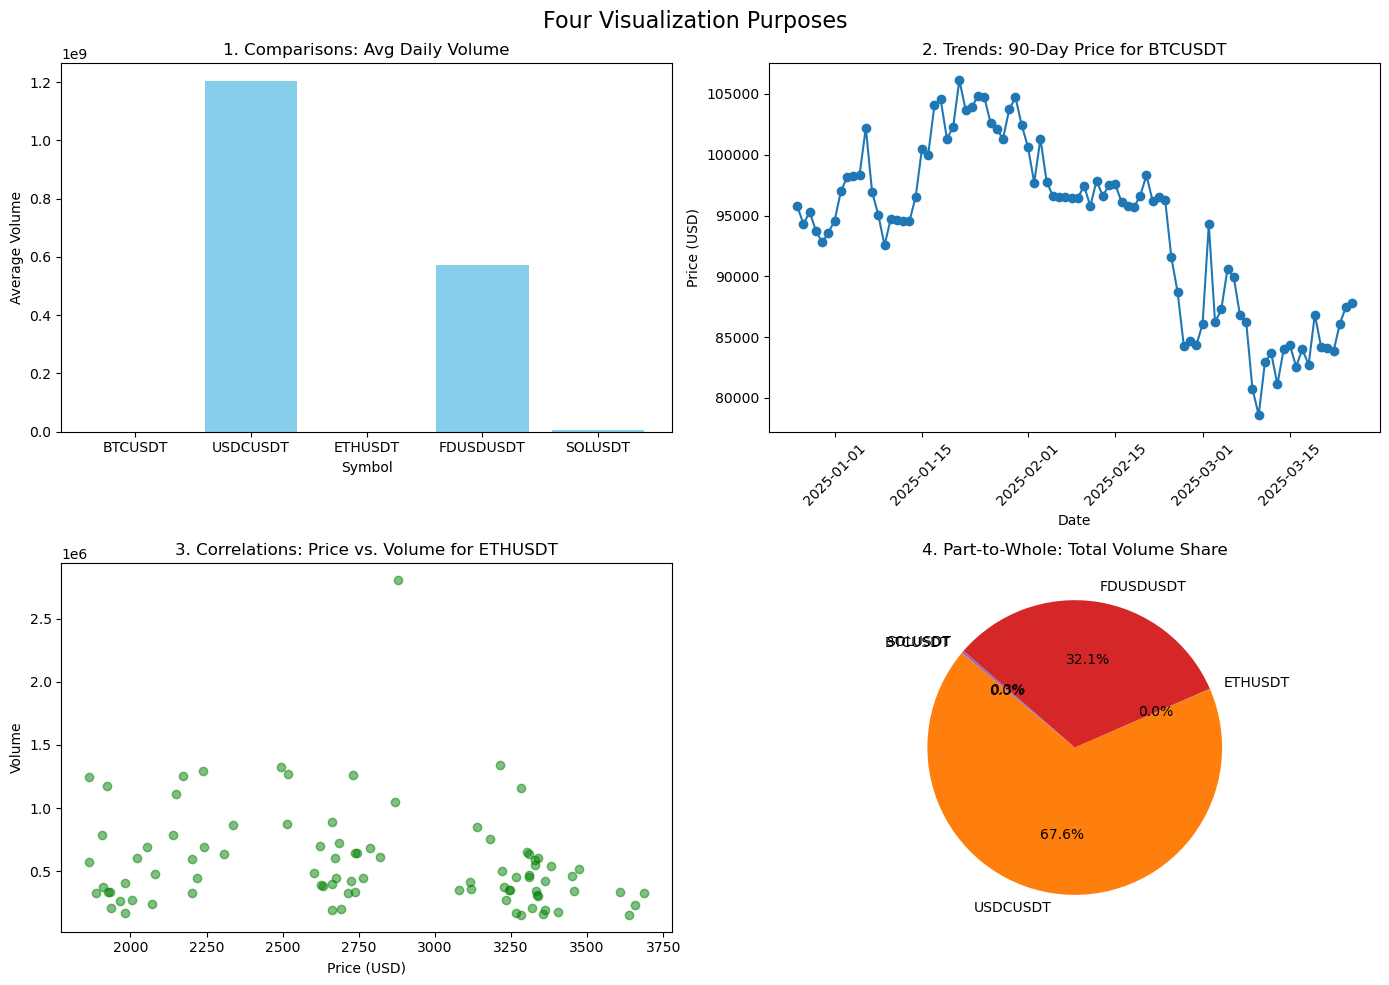

In [317]:
# 1) Comparisons Data: Average Daily Volume
avg_volumes = {}
for symbol, df_sym in historical_data.items():
    avg_volumes[symbol] = df_sym['volume'].mean()

# 2) Trends Data: We'll use BTCUSDT if it exists, otherwise the first symbol
symbol_for_trend = 'BTCUSDT' if 'BTCUSDT' in historical_data else list(historical_data.keys())[0]
df_trend = historical_data[symbol_for_trend]

# 3) Correlations Data: We'll use ETHUSDT if it exists, otherwise the second symbol
symbol_for_corr = 'ETHUSDT' if 'ETHUSDT' in historical_data else list(historical_data.keys())[1]
df_corr = historical_data[symbol_for_corr]

# 4) Part-to-Whole Data: Sum total volume for each symbol
pie_labels = []
pie_values = []
for symbol, df_sym in historical_data.items():
    total_vol = df_sym['volume'].sum()
    pie_labels.append(symbol)
    pie_values.append(total_vol)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Four Visualization Purposes", fontsize=16, y=0.98)

ax1 = axes[0, 0]
symbols_comp = list(avg_volumes.keys())
avg_vals = list(avg_volumes.values())

ax1.bar(symbols_comp, avg_vals, color='skyblue')
ax1.set_title("1. Comparisons: Avg Daily Volume", fontsize=12)
ax1.set_xlabel("Symbol")
ax1.set_ylabel("Average Volume")

ax2 = axes[0, 1]
ax2.plot(df_trend.index, df_trend['price'], marker='o', linestyle='-')
ax2.set_title(f"2. Trends: 90-Day Price for {symbol_for_trend}", fontsize=12)
ax2.set_xlabel("Date")
ax2.set_ylabel("Price (USD)")
ax2.tick_params(axis='x', rotation=45)

ax3 = axes[1, 0]
ax3.scatter(df_corr['price'], df_corr['volume'], alpha=0.5, color='green')
ax3.set_title(f"3. Correlations: Price vs. Volume for {symbol_for_corr}", fontsize=12)
ax3.set_xlabel("Price (USD)")
ax3.set_ylabel("Volume")

ax4 = axes[1, 1]
ax4.pie(pie_values, labels=pie_labels, autopct='%1.1f%%', startangle=140)
ax4.set_title("4. Part-to-Whole: Total Volume Share", fontsize=12)

plt.tight_layout()
plt.show()

# 1. Poor Labeling

Below is an example of a plot with poor labeling, making it hard to understand the data.

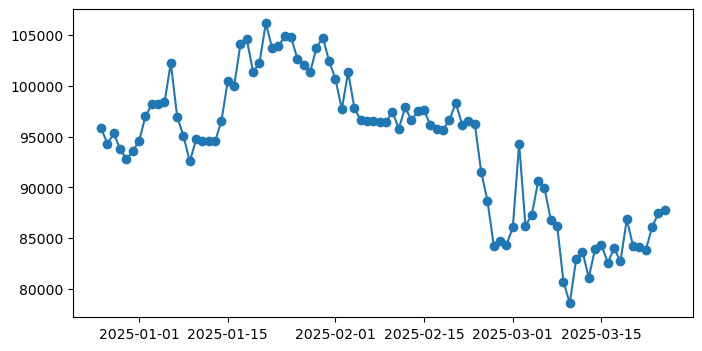

In [319]:
# Pick the first symbol for demonstration
symbol_1 = top5_symbols[0]
df_1 = historical_data[symbol_1]

# Poor labeling example: Plot daily prices without title, axis labels, or legend
plt.figure(figsize=(8, 4))
plt.plot(df_1.index, df_1['price'], marker='o')

# Notice: No plt.title(), no plt.xlabel(), no plt.ylabel(), no legend
plt.show()

# 2. Misleading Scales

The following plot demonstrates how using misleading scales can distort data perception, even in time series

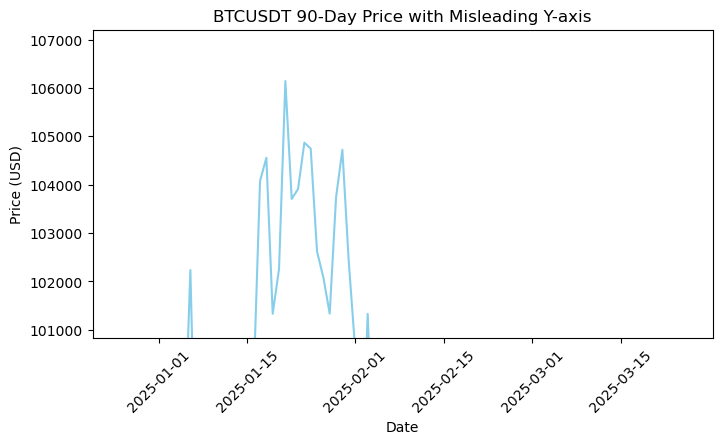

In [321]:
price_min = df_1['price'].min()
price_max = df_1['price'].max()

plt.figure(figsize=(8, 4))
plt.plot(df_1.index, df_1['price'], color='skyblue')

# Misleading: artificially zoom in near the max price
plt.ylim(price_max * 0.95, price_max * 1.01)

plt.title(f'{symbol_1} 90-Day Price with Misleading Y-axis')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.show()

# 3. Cluttered Visualizations

Cluttered visuals can obscure the data’s message. Below is an intentionally overstuffed time series plot for multiple coins.

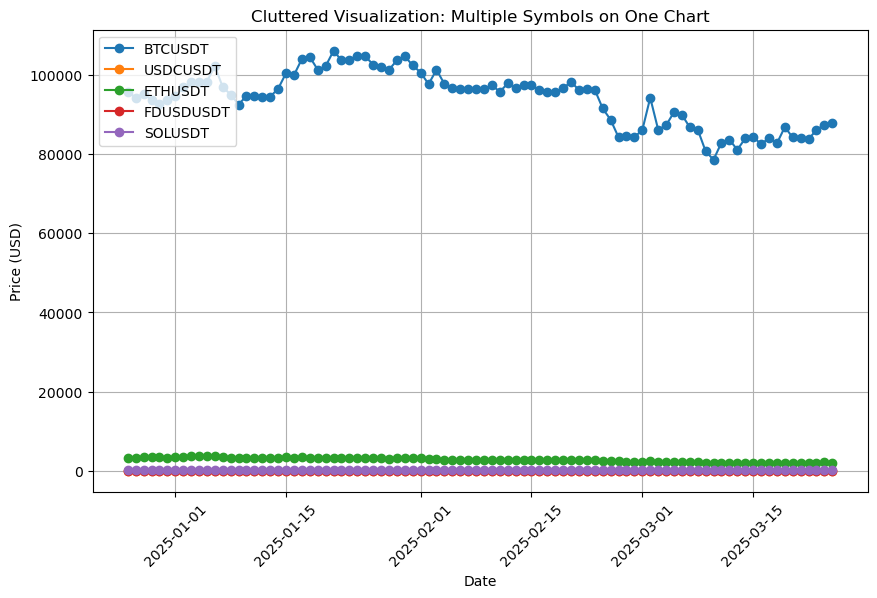

In [323]:
plt.figure(figsize=(10, 6))

# Plot all top 5 symbols in one figure with markers, labels, etc.
for symbol in top5_symbols:
    df_sym = historical_data[symbol]
    plt.plot(df_sym.index, df_sym['price'], marker='o', linestyle='-', label=symbol)

plt.title('Cluttered Visualization: Multiple Symbols on One Chart')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

# 4. Bad Color Choices

Poor color choices can hinder readability, especially for time series with multiple lines. Below is an example with clashing, non-accessible colors.

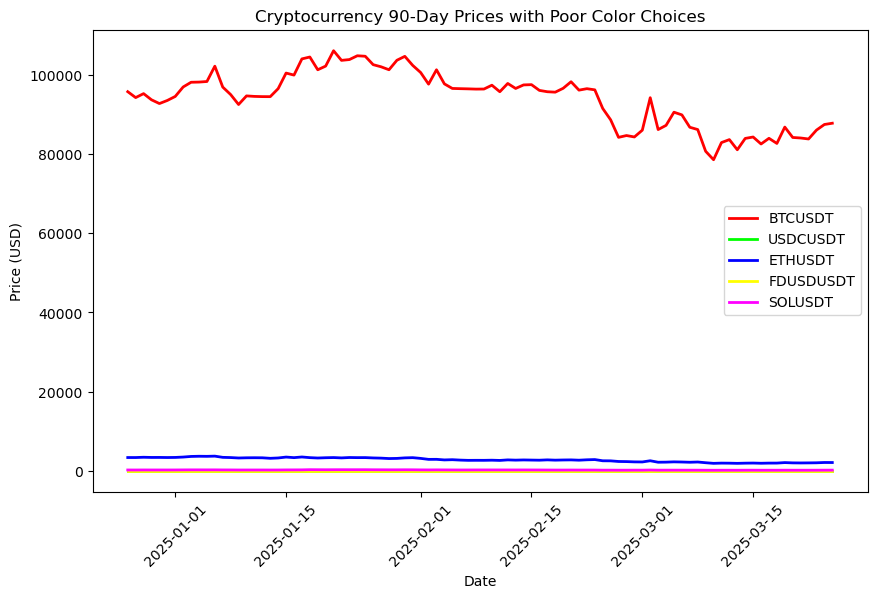

In [325]:
# Assign clashing colors for the 5 symbols
colors = ['#ff0000', '#00ff00', '#0000ff', '#ffff00', '#ff00ff']

plt.figure(figsize=(10, 6))

for idx, symbol in enumerate(top5_symbols):
    df_sym = historical_data[symbol]
    plt.plot(df_sym.index, df_sym['price'],
             color=colors[idx % len(colors)],
             label=symbol, linewidth=2)

plt.title('Cryptocurrency 90-Day Prices with Poor Color Choices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 5. Unnecessary Effects

Effects such as 3D visuals can distract from the data. The example below demonstrates an unnecessary 3D line plot.

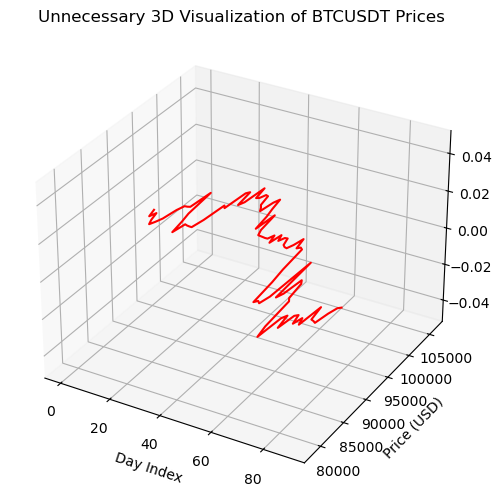

In [327]:
# We'll plot the first symbol in 3D for no good reason
df_1 = historical_data[symbol_1]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = range(len(df_1.index))
ys = df_1['price'].values
zs = [0]*len(df_1.index)  # Z dimension is meaningless here

ax.plot(xs, ys, zs, label='Price', color='red')
ax.set_title(f'Unnecessary 3D Visualization of {symbol_1} Prices')
ax.set_xlabel('Day Index')
ax.set_ylabel('Price (USD)')
plt.show()

# 6. Wrong Chart Type

Selecting the wrong chart type can lead to misinterpretation. For time series data, using a pie chart is almost never appropriate. Below is an example that uses a pie chart of the final price of each coin, which doesn't help show historical trends.

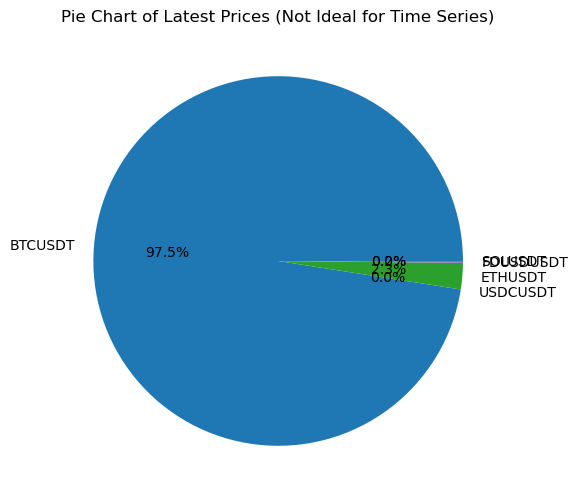

In [329]:
# Create a pie chart of the last known price for each symbol
labels = []
prices = []
for symbol in top5_symbols:
    df_sym = historical_data[symbol]
    latest_price = df_sym['price'].iloc[-1]  # last row's price
    labels.append(symbol)
    prices.append(latest_price)

plt.figure(figsize=(8, 6))
plt.pie(prices, labels=labels, autopct='%1.1f%%')
plt.title('Pie Chart of Latest Prices (Not Ideal for Time Series)')
plt.show()

# 7. Ignoring Data Order

Failing to keep time series data in chronological order can hide important trends. The plot below intentionally shuffles the time index, resulting in a meaningless line chart.

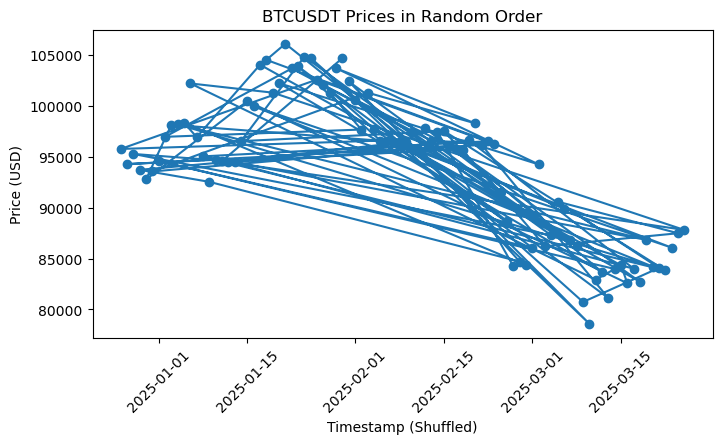

In [331]:
df_shuffled = df_1.sample(frac=1).reset_index(drop=False)

plt.figure(figsize=(8, 4))
plt.plot(df_shuffled['open_time'], df_shuffled['price'], marker='o')
plt.title(f'{symbol_1} Prices in Random Order')
plt.xlabel('Timestamp (Shuffled)')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.show()

# 8. Overplotting Issues

Overplotting can obscure data insights. When plotting multiple time series on the same axes, lines can overlap heavily. Below is a scatter plot of all coin prices over time, which can become quite dense.

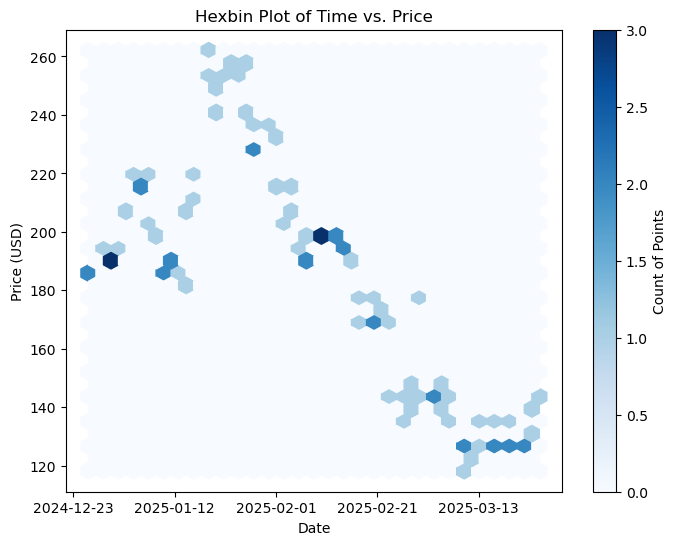

In [334]:
# Suppose x_vals is a DatetimeIndex, y_vals is the price
x_numeric = mdates.date2num(x_vals)  # convert datetime to numeric
plt.figure(figsize=(8, 6))
plt.hexbin(x_numeric, y_vals, gridsize=30, cmap='Blues')
plt.colorbar(label='Count of Points')

# Format the x-axis back to dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.title('Hexbin Plot of Time vs. Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

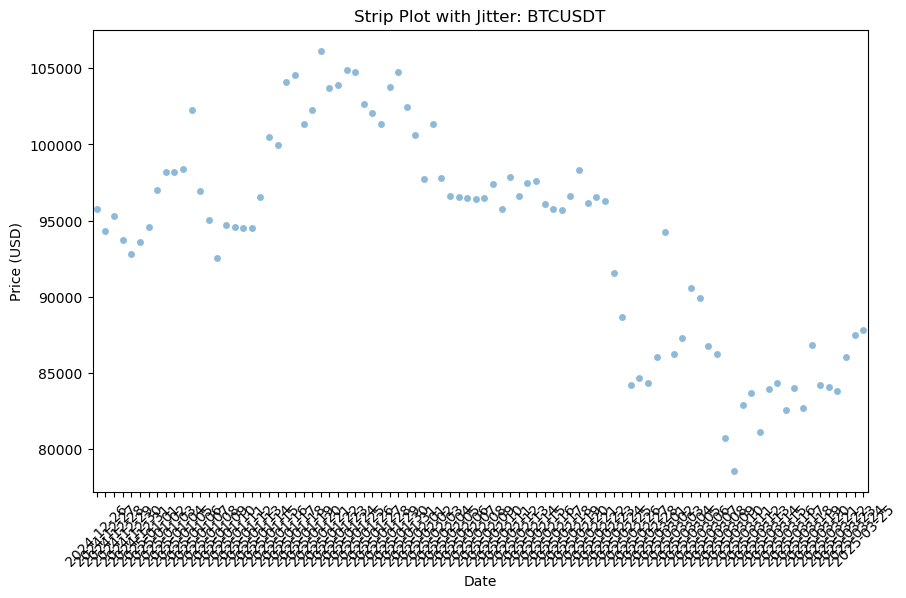

In [336]:
# Pick a single symbol DataFrame
df_sym = historical_data[sample_symbol].copy()

# 1) Copy index (open_time) into a new column 'date'
df_sym['date'] = df_sym.index

# 2) Convert 'date' to string for discrete x-axis
df_sym['date_str'] = df_sym['date'].dt.strftime('%Y-%m-%d')

plt.figure(figsize=(10, 6))
sns.stripplot(data=df_sym, x='date_str', y='price', jitter=True, alpha=0.5)
plt.xticks(rotation=45)
plt.title(f'Strip Plot with Jitter: {sample_symbol}')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

# 9. Enhanced Visualizations with Annotations

Good visualizations not only display data but also guide the viewer’s attention to key insights. According to CardinalPath, using annotations and callouts can improve clarity by emphasizing the most important data points. In the example below, we highlight the highest price in the last 90 days for one symbol.

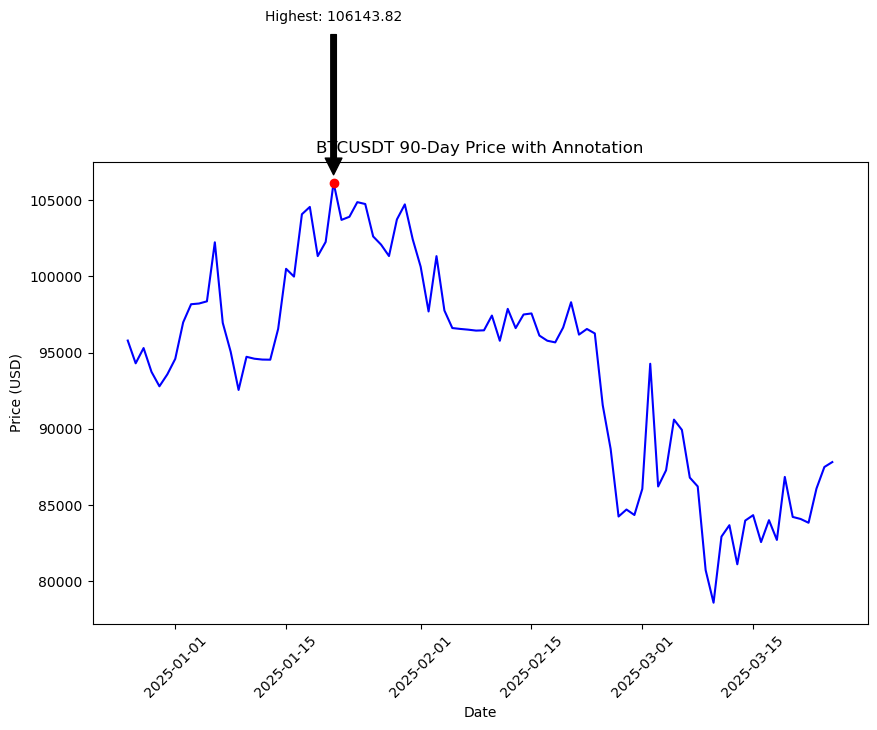

In [340]:
df_1 = historical_data[symbol_1]

plt.figure(figsize=(10, 6))
plt.plot(df_1.index, df_1['price'], color='blue')

# Identify the highest price
max_idx = df_1['price'].idxmax()
max_price = df_1.loc[max_idx, 'price']

plt.scatter(max_idx, max_price, color='red', zorder=5)
plt.annotate(f'Highest: {max_price:.2f}', 
             xy=(max_idx, max_price), 
             xytext=(max_idx, max_price*1.1),
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center')

plt.title(f'{symbol_1} 90-Day Price with Annotation')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.show()

# Additional Design Principles

Key takeaways from CardinalPath's insights on effective visualizations:
- **Know Your Audience:** Tailor your visuals to the audience’s needs and context.
- **Clarity and Simplicity:** Remove unnecessary elements to focus on the main message.
- **Storytelling:** Let the visualization tell a compelling story.
- **Effective Annotation:** Use labels and callouts to emphasize key points.
- **Consistent Design:** Maintain a consistent style with uniform fonts, colors, and spaing.


# References & Resources

- [GeeksforGeeks: Bad Visualization Examples Explained](https://www.geeksforgeeks.org/visualization-examples/)
- [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)
- [Seaborn Documentation](https://seaborn.pydata.org/)
- [CoinGecko API](https://www.coingecko.com/en/api)
- [What Makes a Good Visualization? by CardinalPath](https://www.cardinalpath.com/blog/makes-good-visualiztion)
